In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install ktrain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 56.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 74.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.0/266.0 KB 31.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 106.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 KB 49.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/499A_Project/WINLI/train_400.csv',index_col=False, encoding='iso-8859-1', 
                                warn_bad_lines=True, error_bad_lines=False)

df2 = pd.read_csv('/content/drive/MyDrive/499A_Project/WINLI/test_200.csv',index_col=False, encoding='iso-8859-1', 
                                warn_bad_lines=True, error_bad_lines=False)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
print(df1.head())

                                                text  \
0  I stuck a pin through a carrot. When I pulled ...   
1  John couldn't see the stage with Billy in fron...   
2  The police arrested all of the gang members. T...   
3  I couldn't put the pot on the shelf because it...   
4  We had hoped to place copies of our newsletter...   

                                              text.1  label  
0                             The carrot had a hole.      1  
1                                  John is so short.      1  
2  The police were trying to stop the drug trade ...      1  
3                              The pot was too tall.      1  
4  There were simply not enough copies of the new...      1  


In [ ]:
print(df2.head())

                                                text  \
0  I saw Jim yelling at some guy in a military un...   
1  George got free tickets to the play, but he ga...   
2  The trophy doesn't fit into the brown suitcase...   
3  Mark became absorbed in Blaze, the white horse...   
4  Tom threw his schoolbag down to Ray after he r...   

                                              text.1  label  
0  I don't know who the guy in uniform was, but h...      1  
1       George was not particularly eager to see it.      1  
2                         The suitcase is too small.      1  
3  Mark took upon himself the feeding and care of...      1  
4              Ray reached the bottom of the stairs.      1  


In [ ]:
df1.label[df1.label == 1]="acpt"
df1.label[df1.label == 0]="unac"

df2.label[df2.label == 1]="acpt"
df2.label[df2.label == 0]="unac"

<ipython-input-8-af200db6912b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.label[df1.label == 1]="acpt"
<ipython-input-8-af200db6912b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.label[df2.label == 1]="acpt"


In [ ]:
# taking acceptable and deleting unacceptable
df3 = df1[~df1.label.str.contains('acpt')]
df3 = df3.sample(n=200, replace=True)
df3["label"].value_counts()

unac    200
Name: label, dtype: int64

In [ ]:
# taking acceptable and deleting unacceptable
df4 = df1[~df1.label.str.contains('unac')]
df4 = df4.sample(n=200, replace=True)
df4["label"].value_counts()

acpt    200
Name: label, dtype: int64

In [ ]:
frames = [df3, df4]

temp = pd.concat(frames)

In [ ]:
temp["label"].value_counts()

unac    200
acpt    200
Name: label, dtype: int64

In [ ]:
# taking acceptable and deleting unacceptable
df5 = df2[~df2.label.str.contains('acpt')]
df5 = df5.sample(n=50, replace=True)
df5["label"].value_counts()

unac    50
Name: label, dtype: int64

In [ ]:
# taking acceptable and deleting unacceptable
df6 = df2[~df2.label.str.contains('unac')]
df6 = df6.sample(n=50, replace=True)
df6["label"].value_counts()

acpt    50
Name: label, dtype: int64

In [ ]:
frames2 = [df5, df6]

temp2 = pd.concat(frames2)

In [ ]:
temp2["label"].value_counts()

unac    50
acpt    50
Name: label, dtype: int64

In [ ]:
frames3 = [df3, df4, df5, df6]

temp3 = pd.concat(frames3)

In [ ]:
temp3["label"].value_counts()

unac    250
acpt    250
Name: label, dtype: int64

In [ ]:
text1 = temp3['text']+temp3['text']
emotion= temp3['label'].tolist()
text=text1.values.tolist()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text , emotion, test_size=.2, random_state=42)

In [ ]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

400
400
100
100


In [ ]:
import ktrain
from ktrain import text
MODEL_NAME = 'bert-base-multilingual-uncased'
t = text.Transformer(MODEL_NAME, maxlen=500)

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/999M [00:00<?, ?B/s]

In [ ]:
trn = t.preprocess_train(X_train, y_train)
val = t.preprocess_test(X_test, y_test)

preprocessing train...
language: en
train sequence lengths:
	mean : 39
	95percentile : 85
	99percentile : 97


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/872k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.72M [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 39
	95percentile : 79
	99percentile : 97


In [ ]:
model = t.get_classifier()

In [ ]:
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=6)

In [ ]:
learner.fit_onecycle(2e-5, 20)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/20
67/67 [==============================] - 71s 787ms/step - loss: 0.6977 - accuracy: 0.5050 - val_loss: 0.6919 - val_accuracy: 0.5400
Epoch 2/20
67/67 [==============================] - 49s 737ms/step - loss: 0.6885 - accuracy: 0.5400 - val_loss: 0.6905 - val_accuracy: 0.5200
Epoch 3/20
67/67 [==============================] - 50s 742ms/step - loss: 0.6694 - accuracy: 0.6175 - val_loss: 0.6882 - val_accuracy: 0.5600
Epoch 4/20
67/67 [==============================] - 50s 739ms/step - loss: 0.6544 - accuracy: 0.6125 - val_loss: 0.6883 - val_accuracy: 0.5500
Epoch 5/20
67/67 [==============================] - 50s 740ms/step - loss: 0.6173 - accuracy: 0.6675 - val_loss: 0.7295 - val_accuracy: 0.5500
Epoch 6/20
67/67 [==============================] - 50s 740ms/step - loss: 0.6092 - accuracy: 0.6625 - val_loss: 0.6864 - val_accuracy: 0.5700
Epoch 7/20
67/67 [==============================] - 50s 741ms/step - loss: 0.71

In [ ]:
class_names=["acpt","unac"]

In [ ]:
learner.validate(val_data=(val), class_names=class_names)

4/4 [==============================] - 4s 310ms/step
              precision    recall  f1-score   support

        acpt       0.58      0.51      0.54        49
        unac       0.58      0.65      0.61        51

    accuracy                           0.58       100
   macro avg       0.58      0.58      0.58       100
weighted avg       0.58      0.58      0.58       100



array([[25, 24],
       [18, 33]])

simulating training for different learning rates... this may take a few moments...
66/66 [==============================] - 44s 668ms/step - loss: 7.1095 - accuracy: 0.6833


/usr/local/lib/python3.8/dist-packages/ktrain/lroptimize/lrfinder.py:267: UserWarning: Shape of array too small to calculate a numerical gradient, at least (edge_order + 1) elements are required.
  warnings.warn(str(e))




done.
Visually inspect loss plot and select learning rate associated with falling loss


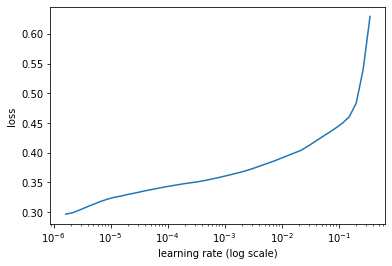

In [ ]:
learner.lr_find(show_plot=True, max_epochs=1)